# Assignment 2a Due

In this assigment you will explore and become familiar with writing and using algorithms to numerically approxomate definite integrals.

Assignment Overview:
* Impliment your own midpoint, trapazoid, and Simpson's rule integration algorithms
* Use those to solve a definite integral
* Compare your algorithms to those from scipy
* Compare all approximate solutions to the exact solutions


You can import only the following packages: numpy, math, scipy, matplotlib.pyplot

In [188]:
#your import cell
import numpy as np
import matplotlib.pyplot as mp
import math 
import scipy
from scipy import integrate

Now we can define our integration algorithms

In [189]:
#define midpoint rule
def midpoint(f,x0,xn,n):
    dx = (xn-x0)/float(n)
    aream = dx*math.fsum(f(x0 + (i+0.5)*dx) for i in range (0,n))
    return aream

In [190]:
#define trapazoidal rule
def trap(f,x0,xn,n):
    dx = (xn-x0)/float(n)
    #area = 0.5*dx*math.fsum(2*f(x0 + i*dx) for i in range (1,n))
    #area += 0.5*dx*(f(x0) + f(xn))
    areat = dx*math.fsum(0.5*(f(x0 +i*dx) + f(x0 + (i+1)*dx)) for i in range (0,n))
    return areat

In [191]:
#define simpson's rule
def simp(f,x0,xn,n):
    dx = (xn-x0)/float(n)
    s_odd = 0
    s_even = 0
    for i in range (1,n,2):
        s_odd += 4*f(x0 + i*dx) 
    for j in range (2,n-1,2):
        s_even += 2*f(x0 + j*dx) 
    areas = (dx/3.0)*(f(x0) + s_even + s_odd + f(xn))
    return areas

# Question 
Sanity checking your code is very important. How can you check that your functions are working properly?

By calling the function

For this notebook assigment we would like to solve the integral\
$\int_{a}^{b} \frac{2}{(2^2 + x^2)^{3/2}}dx$


# Question
Have you seen an integral like this before in physics? From where?

Solve the above integral using the numerical integrations that you wrote. When defining the function we will integrate over do so using python's **lambda** function.

For the integration take $a = 0,\; b = 2,\;$ and we will split it up into 6 partitions.

# Question
What is the exact solution?

In [192]:
#exact solution to the integral
exact = 1/(2*((2)**0.5))
print (exact)

0.35355339059327373


In [193]:
#solve the integral using your integration functions
xn = 2
x0 = 0
n = 6
dx = (xn-x0)/n
f = lambda x: 2*(1/((4+(x**2))**(3/2)))
                 
def midpoint(f,x0,xn,n):
    dx = (xn-x0)/float(n)
    aream = dx*math.fsum(f(x0 + (i+0.5)*dx) for i in range (0,n))
    print ("Midpoint",aream)
    return aream

def trap(f,x0,xn,n):
    dx = (xn-x0)/float(n)
    areat = dx*math.fsum(0.5*(f(x0 +i*dx) + f(x0 + (i+1)*dx)) for i in range (0,n))
    print ("Trapazoid",areat)
    return areat

def simp(f,x0,xn,n):
    dx = (xn-x0)/float(n)
    s_odd = 0
    s_even = 0
    for i in range (1,n,2):
        s_odd += 4*f(x0 + i*dx) 
    for j in range (2,n-1,2):
        s_even += 2*f(x0 + j*dx) 
    areas = (dx/3.0)*(f(x0) + s_even + s_odd + f(xn))
    print("Simpson",areas)
    return areas


Use the trapz and simps methods from scipy's integration library to solve the integral.

Note: Shit+tab at the end of a function in jupyter notebook reveals lots of information about the function.

In [194]:
#scipy integration
from scipy import integrate
import math

x = np.linspace(0,2,6)
print(x)
y = 2*(1/((4+(x**2))**(3/2)))
Is = scipy.integrate.simps (y,x,dx)
print (Is)
It = np.trapz (y,x,dx)
print (It)
print ("Scipy Simps",Is)
print ("Scipy Trapz",It)

mid= midpoint (f,x0,xn,n)
trap= trap (f,x0,xn,n)
simp = simp(f,x0,xn,n)

[0.  0.4 0.8 1.2 1.6 2. ]
0.3532157038993122
0.3526702692186624
Scipy Simps 0.3532157038993122
Scipy Trapz 0.3526702692186624
Midpoint 0.3538599754585315
Trapazoid 0.35293994641413146
Simpson 0.3535517906244493


# Question
How do scipy integrals compare to yours? Support your answer. 

Easier to use, more efficient

In [195]:
#print the numerical values
print ("Scipy Simps",Is)
print ("Scipy Trapz",It)
print ("Function Midpoint", mid )
print ("Function Trapazoid", trap)
print ("Function Simpsons", simp)

Scipy Simps 0.3532157038993122
Scipy Trapz 0.3526702692186624
Function Midpoint 0.3538599754585315
Function Trapazoid 0.35293994641413146
Function Simpsons 0.3535517906244493


Numerically compare your midpoint, trapazoid, and Simpson method results to the exact value by calculating the quantity (approx - exact) / exact for each method. 

In [196]:
#numerical comparisons
m = (mid - exact)/exact
print ("m", m)
t= (trap - exact)/exact
print ("t", t)
s= (simp - exact)/exact
print ("s", s)


m 0.0008671529489316845
t -0.001735082155803672
s -4.525395221761466e-06


# Question
Which method provides the best approximation to the exact solution?

Simpson's Method gives the most accurate answer

It is often useful to represent the data graphically. Make a scatter plot showing the percent difference $100 \times \frac{approx. - exact}{exact}$ vs. integration method. Integration method on your x-axis should be strings such as *midpoint, trapazoid, and Simpson*. You should also draw on your plot a line at *y = 0*, which will help guide the eye where the perfect approximation (the exact solution) would sit. 

0.08671529489316845
-0.1735082155803672
-0.00045253952217614657


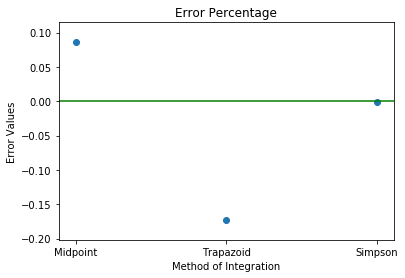

In [197]:
#plot

m = m*100
t = t*100
s = s*100
print (m)
print (t)
print (s)

x = [str("Midpoint"), str("Trapazoid"), str ("Simpson")]
y = [m,t,s]

mp.figure()
mp.scatter (x,y)
mp.axhline (y=0, color = 'g')
mp.title("Error Percentage")
mp.ylabel("Error Values")
mp.xlabel("Method of Integration")
mp.show()


Using the scipy *quad* integration method, approximate the following integral

$$\int_{-\infty}^{\infty} e^{-x^{2}} dx$$

Hint: Reference <a href="https://numpy.org/">numpy</a> and see what it has to offer in terms of functions and *special* values

In [198]:
import numpy as np
import scipy
from scipy import integrate
def f(x):
    return np.exp(-x**2)

xn= np.inf
x0= -np.inf
n = 6

Ie= integrate.quad(lambda x: np.exp(-x**2),-np.inf, np.inf)
print (Ie)
Ie = Ie[0]**2
print ("Squared Value", Ie)

(1.7724538509055159, 1.4202636780944923e-08)
Squared Value 3.1415926535897927


# Question
If you square your solution, does the resulting number have any special meaning?

The squared value is the value of pi